In [1]:
#this code looks to compare the R2 value and run time for a
#given KNN value.


from sklearn.datasets import fetch_openml
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.linear_model as skl_lm
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

from sklearn import utils
from sklearn import preprocessing
from sklearn import neighbors
from pandas import read_csv

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn import preprocessing

from sklearn.feature_selection import SelectKBest

import csv
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
kfld = KFold(n_splits=3,random_state=42)

In [2]:
#Reads data in from data folder.

data = read_csv('data/ethylene_methane.txt',delim_whitespace=True)
print(data.shape)

(4178504, 19)


In [3]:
#creates a new attribute thats the % Methane, in cases where we divide by zero
#we recieve a NAN which is replaced by a 0
#this code also finds all unique PPM for methane

data['Methane%'] = (data['Methane(ppm)']/(data['Methane(ppm)']+data['Ethylene(ppm)']))
data['Methane%'] = data['Methane%'].fillna(0)

ppm = data['Methane(ppm)'].unique()

data = data.drop(columns = ['Time(sec)', 'sensor1', 'sensor2','sensor9','sensor10'])

sensor_name = ['sensor3', 'sensor4', 'sensor5','sensor6', 'sensor7', 'sensor8', 'sensor11','sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor16']


In [4]:
#This block searches for Outliers for each PPM of Methane and then drops them
#from the file.

for j in sensor_name:
    print(j)
    for i in np.sort(ppm):    
        data2 = data[data["Methane(ppm)"] == i] #only select a specific PPM to begin trimming
        
        results = data2[j].quantile([0.125,0.875]) #Next lines calculate the range for non-Outliers
        IQR_15 = 1.5*(results.loc[0.875] - results.loc[0.125])
        fq = results.loc[0.125] - IQR_15
        tq = results.loc[0.875] + IQR_15
                
        index = data2[(fq>data2[j]) | (tq<data2[j])] #Finds Outliers
        data = data.drop(index.index) #Uses index of Outliers to drop rows from data 
        
        
        #print('Methane(ppm) = ',i)
        #print('Outlier range',fq , tq)
        #print(data.shape)
        #print("")

sensor3
sensor4
sensor5
sensor6
sensor7
sensor8
sensor11
sensor12
sensor13
sensor14
sensor15
sensor16


In [5]:
#Defines our X and y and sets y equal to 1 if the Methane % is greater than 50%
#and splits the data into test and train sets

X = data.drop(columns = ['Methane(ppm)','Ethylene(ppm)','Methane%'])
y = np.where(data['Methane%'] >= 0.5, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)  


In [6]:
#This block runs a loop for calculating the R2 and run time for a given value
#of K nearest neighbors

k_val = [3,4,5,6,7,8]
scores = list()
times = list()
for k in k_val:
    start =time.time()
    knn = neighbors.KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    score = cross_val_score(knn, X_test, y_test, cv=kfld, scoring='r2').mean()
    end = time.time()
    print(score)
    print('Time (sec) = ',(end-start))
    scores.append(score)
    times.append((end-start))

0.966193648937293
Time (sec) =  383.51973509788513
0.9663846601051675
Time (sec) =  412.6782548427582
0.9679823495878493
Time (sec) =  432.40350699424744
0.9677482265548653
Time (sec) =  463.28946805000305
0.9688920550429563
Time (sec) =  465.6989760398865
0.9683971185161018
Time (sec) =  480.72034215927124


Text(0, 0.5, 'R2')

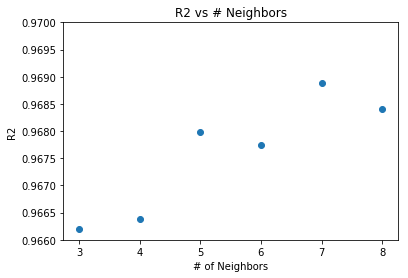

In [16]:
#Plots the R2 vs the K nearest neighbors
#One thing i wanted to point out is I scaled this one so that i could see 
#how large of a jump in R2 we had per K but ultimiately its so small compared
#to the run time that we selected K=3.

plt.ylim(0.966, 0.97) 
plt.scatter(k_val,scores)
plt.title("R2 vs # Neighbors")
plt.xlabel("# of Neighbors")
plt.ylabel("R2")

Text(0, 0.5, 'Time (sec)')

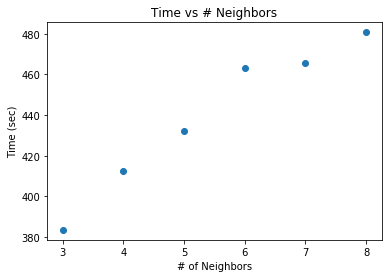

In [15]:
#Plots the Time vs the K nearest neighbors
# We ended up with K=3 for our final selection since it has the fastest runtime
# and loses very little in R2 as a result
plt.scatter(k_val,times)
plt.title("Time vs # Neighbors")
plt.xlabel("# of Neighbors")
plt.ylabel("Time (sec)")

In [ ]:
#knn_y = knn.predict(X_test)
#confusion_matrix(y_test, knn_y)